(model-data)=
# Daten modellieren

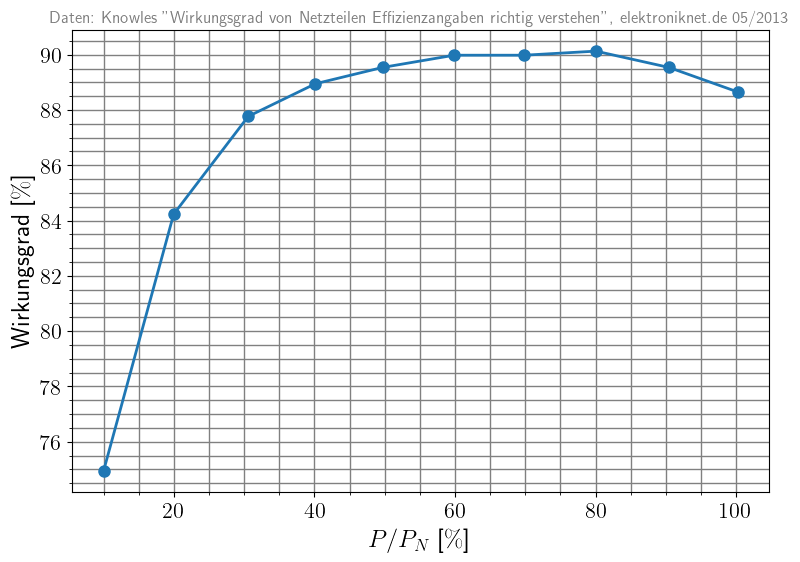

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import shutil
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.autolayout'] = False
plt.rcParams['figure.figsize'] = 10, 6
plt.rcParams['axes.labelsize'] = 18
plt.rcParams['axes.titlesize'] = 20
plt.rcParams['font.size'] = 18
plt.rcParams['lines.linewidth'] = 2.0
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 18
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['ytick.labelsize'] = 16
if shutil.which('latex'): plt.rcParams['text.usetex'] = True
ymin = 50 # minimaler Wirkungsgrad (Minimum y-Achse)
ymax = 95 # maximaler Wirkungsgrad (Maximum y-Achse)
eta = pd.read_csv('../data/schaltnetzteil.csv',header=None)
eta.rename(columns={0:'xpixel'},inplace=True)
eta.rename(columns={1:'ypixel'},inplace=True)
eta['xpxgenullt'] = eta['xpixel']-eta.iloc[0,0]
eta['ypxgenullt'] = -(eta['ypixel']-eta.iloc[0,1])
x100prozent = eta.iloc[1,2]
eta['P/PN'] = eta['xpxgenullt']*100/x100prozent
y100prozent = eta.iloc[2,3]
eta['Wirkungsgrad'] = ymin+eta['ypxgenullt']*(ymax-ymin)/y100prozent
eta.drop(axis = 0, index = 0, inplace=True)
eta.drop(axis = 0, index = 1, inplace=True)
eta.drop(axis = 0, index = 2, inplace=True)
plt.figure(figsize=(9,6))
plt.plot(eta['P/PN'],eta['Wirkungsgrad'],'o-')
plt.minorticks_on()
plt.grid(color='gray', linestyle='-', linewidth=1,which='both')
plt.xlabel(r'$P/P_N$ [$\%$]')
plt.ylabel(r'Wirkungsgrad [$\%$]')
plt.title('Daten: Knowles "Wirkungsgrad von Netzteilen Effizienzangaben richtig verstehen", elektroniknet.de 05/2013',
              color='gray', fontsize=12)
plt.show()

:::{admonition} **Beispielfrage für mündliche Prüfung**
Was sehen wir hier? Was hat das mit Energieeffizienz zu tun? Was ist bei der Dimensionierung zu beachten?
:::

Aus zwei Gründen ist es notwendig, für Analysen Daten zu modellieren: Zum einen existieren häufig nur unvollständige Datensätze, d.h. punktuelle Messungen oder lückenhafte längerdauernde Messungen mit teilweise unpassenden Parametern. Um einen vollständigen Ist-Stand zu erzeugen, ist es nicht möglich Jahresmessungen nachzuholen. Abhilfe schafft die Modellierung des Ist-Standes. Zum anderen sind viele Energieeffizienzmaßnahmen vergleichsweise aufwendig in der Umsetzung. D.h. es ist besser, erst einmal in einer Berechnung mit einem entsprechend der Maßnahme veränderten Datensatz abzuschätzen, ob sich eine Maßnahme lohnt. D.h. auch Energieeffizienzmaßnahmen finden Eingang in modellierte Zeitreihen. Dieses Kapitel befasst sich damit, wie man solche Modelle auf einfache Weise umsetzen kann. Bewusst sind hier keine komplexen Energiesystemmodelle im Einsatz, da Kursteilnehmende in der Regel damit noch keine Erfahrung haben. Jedoch ist es für eine Vorstudie (=die Projektaufgabe) natürlich erlaubt, bereits vorhandene und bekannte Modelle einzusetzen, dort wo dies Sinn macht.

![Modellbildungsprozess](../img/modellbildungsprozess.png)

- [ ] [Referenzdatensatz aus Annahmen](gen-ref) erzeugen (jupyter notebook unter `files/07/SYE-generate-reference.ipynb`)
- [ ] [Annahmen aus Typenschildern](nameplate-model) ableiten
- [ ] [Strom und Scheinleistung nach Blindleistungskompensation oder Leistungsfaktorkorrektur](model-reactive-power-comp) modellieren (jupyter notebook unter `files/07/SYE-model-reactive-power-comp.ipynb`)
- [ ] [Auswirkungen von Teillast- und Volllastbetrieb mit Wirkungsgradkurven](efficiencycurve) modellieren (jupyter notebook zu finden in `files/07/SYE-efficiencycurve.ipynb`)
- [ ] [Lineare Regression](linearregression) nutzen, um Zwischenwerte zu schätzen (jupyter notebook unter `files/07/SYE-linearregression.ipynb`)

:::{bibliography}
:filter: docname in docnames
:::